In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from os import listdir
from os.path import isfile, join
import seaborn as sns
plt.style.use("https://raw.githubusercontent.com/FabianSchubert/mpl_style/main/custom_style.mplstyle")

In [66]:
results_files = [f for f in listdir("./results_data/") if isfile(join("./results_data/", f))]

for k, file in enumerate(results_files):
    _data = np.load(join("./results_data/", file))
    if k==0:
        df_results = pd.DataFrame({'train time': _data["train_time"],
                                    'false positive': _data["false_pos"],
                                    'false negative': _data["false_neg"],
                                    "error": _data["err"],
                                    "event based": _data["event_based"]}, index=[k])
    else:
        df_results = pd.concat([df_results, pd.DataFrame({'train time': _data["train_time"],
                                    'false positive': _data["false_pos"],
                                    'false negative': _data["false_neg"],
                                    "error": _data["err"],
                                    "event based": _data["event_based"]}, index=[k])], ignore_index=True)

In [67]:
df_results

,train time,false positive,false negative,error,event based
0,114.308417,0.049505,0.01,0.000000,False
1,65.588881,0.039604,0.05,0.021053,True
2,128.459095,0.049505,0.03,0.020619,False
3,64.622144,0.009901,0.08,0.032609,True
4,114.929506,0.059406,0.01,0.000000,False
5,65.612040,0.029703,0.13,0.080460,True
6,70.862259,0.019802,0.04,0.072917,True
7,67.174179,0.039604,0.12,0.079545,True
8,68.511834,0.009901,0.06,0.063830,True
9,65.723761,0.039604,0.05,0.052632,True


In [12]:
df_results[df_results["event based"]].mean()

train time        89.368714
false positive     0.009901
false negative     0.130000
error              0.068966
event based        1.000000
dtype: float64

In [13]:

df_results[df_results["event based"] == False].mean()

train time        127.307525
false positive      0.062376
false negative      0.034000
error               0.075590
event based         0.000000
dtype: float64

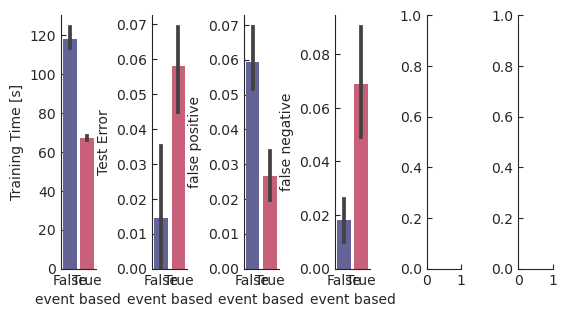

In [70]:
fig, ax = plt.subplots(2, 4, figsize=(5.5,3))

sns.barplot(data=df_results, x="event based", y="train time", ax=ax[0])
sns.barplot(data=df_results, x="event based", y="error", ax=ax[1])
sns.barplot(data=df_results, x="event based", y="false positive", ax=ax[2])
sns.barplot(data=df_results, x="event based", y="false negative", ax=ax[3])

ax[0].set_ylabel("Training Time [s]")
ax[1].set_ylabel("Test Error")

fig.tight_layout(pad=0.1)

plt.show()